# Decision Tree

In [79]:
import pandas as pd
import numpy as np
from sklearn import tree as tr
import cv2
import pydotplus
import matplotlib.pyplot as plt
from IPython.display import Image
from six import StringIO
from sklearn import metrics as mt

In [3]:
X_training = pd.read_csv('/X_training.csv')
y_training = pd.read_csv('/y_training.csv')
X_test = pd.read_csv('/X_test.csv')
y_test = pd.read_csv('/y_test.csv')
X_validation = pd.read_csv('/X_validation.csv')
y_validation = pd.read_csv('/y_validation.csv')

In [75]:
tree_clf = tr.DecisionTreeClassifier(max_depth=8)
tree_clf.fit(X_training, y_training)

DecisionTreeClassifier(max_depth=8)

In [38]:
features = ['id','customer_type', 'age', 'class','flight_distance','inflight_wifi_service',
            'departure_arrival_time_convenient','ease_of_online_booking',
           'gate_location','food_and_drink','online_boarding', 'seat_comfort','inflight_entertainment',
            'on_board_service','leg_room_service','baggage_handling','checkin_service','inflight_service',
            'cleanliness','departure_delay_in_minutes', 'arrival_delay_in_minutes','gender_Female','gender_Male',
            'type_of_travel_business_travel' ,'type_of_travel_personal_travel']


In [40]:
y_training_array = np.array(y_training)

In [76]:
import pandas as pd
from sklearn.tree import export_graphviz
from io import StringIO

# Converta a coluna de rótulos de classe para string
y_training_str = y_training.astype(str)

# Combine os DataFrames X_training e y_training
combined_df = pd.concat([X_training, y_training_str], axis=1)

# Lista de características
features = list(X_training.columns)

# Nome da coluna que contém os rótulos de classe
target_column = y_training_str.columns[0]

# Crie um StringIO para armazenar a saída do export_graphviz
dot_data = StringIO()

# Exporte a árvore de decisão usando export_graphviz
export_graphviz(
    tree_clf,
    out_file='tree.dot',
    feature_names=features,
    class_names=combined_df[target_column].unique(),  # Rótulos de classe únicos
    rounded=True,
    filled=True
)


In [77]:
!dot -Tpng tree.dot -o tree.png

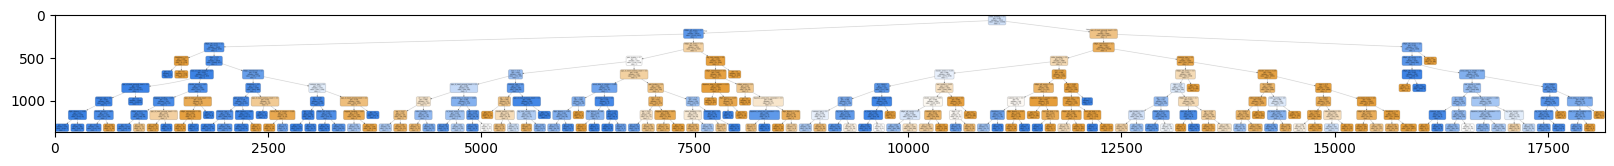

In [78]:
# Load image on jupyter notebook
image = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(image)

In [118]:
ypred = tree_clf.predict(X_training)

In [71]:
# Converta a coluna de rótulos de classe para string
y_training_str1 = y_training.astype(str)

# Combine os DataFrames X_training e y_training
combined_df = pd.concat([X_training, y_training_str1], axis=1)

# Lista de características
features = list(X_training.columns)

# Nome da coluna que contém os rótulos de classe
target_column = y_training_str1.columns[0]

# Crie um StringIO para armazenar a saída do export_graphviz
dot_data = StringIO()

# Exporte a árvore de decisão usando export_graphviz
export_graphviz(
    tree_clf,
    out_file='tree.dot1',
    feature_names=features,
    class_names=combined_df[target_column].unique(),  # Rótulos de classe únicos
    rounded=True,
    filled=True
)

# Agora você pode usar dot_data.getvalue() para obter a representação em string da árvore

In [72]:
!dot -Tpng 'tree.dot1' -o 'tree.png1'

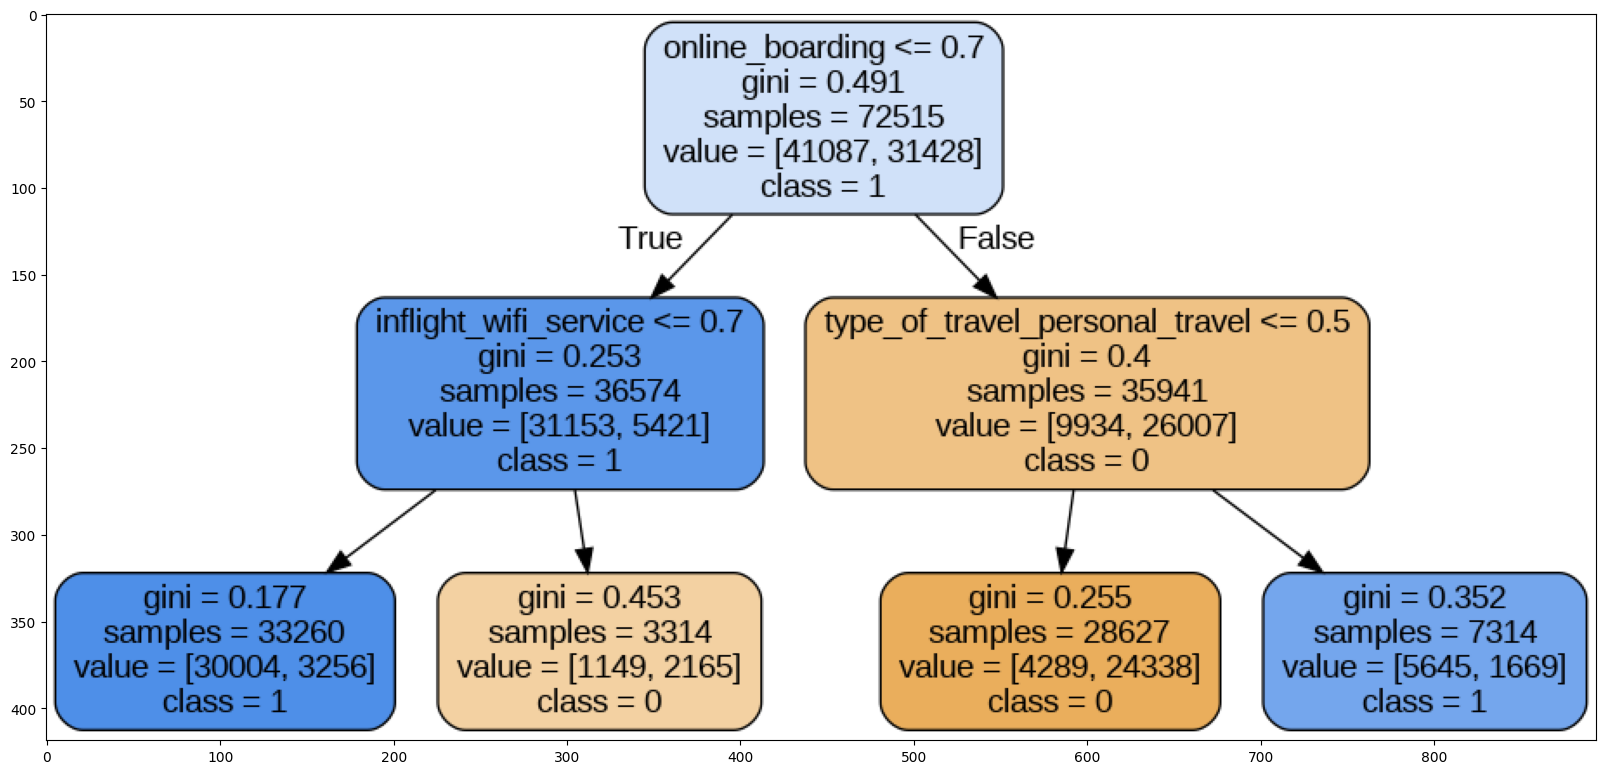

In [74]:
image1 = cv2.imread('tree.png1')
plt.figure(figsize=(20,20))
plt.imshow(image1)

In [93]:
acc = mt.accuracy_score(y_training, ypred)
print(acc)

0.9427015100324071


In [95]:
precision = mt.precision_score(y_training, ypred)
print(precision)

0.9503318912849642


In [96]:
recall = mt.recall_score(y_training, ypred)
print(recall)

0.9156484663357516


In [97]:
f1 = mt.f1_score(y_training, ypred)
print(f1)

0.9326678442366593


In [100]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_training, ypred))
print('Sobre os dados de test')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     41087
           1       0.95      0.92      0.93     31428

    accuracy                           0.94     72515
   macro avg       0.94      0.94      0.94     72515
weighted avg       0.94      0.94      0.94     72515

Sobre os dados de test


# Previsao com os dados de Validação

In [129]:
ypredvalidacao = tree_clf.predict(X_validation)

In [1]:
mt.accuracy_score(y_validation,ypredvalidacao )

NameError: name 'mt' is not defined

In [131]:
mt.precision_score(y_validation,ypredvalidacao)

0.9474577578890517

In [132]:
mt.recall_score(y_validation,ypredvalidacao)

0.9117232162744079

In [133]:
mt.f1_score(y_validation,ypredvalidacao)

0.9292470677260688

In [135]:
classification_val = classification_report(y_validation,ypredvalidacao)
print(classification_val)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17610
           1       0.95      0.91      0.93     13469

    accuracy                           0.94     31079
   macro avg       0.94      0.94      0.94     31079
weighted avg       0.94      0.94      0.94     31079



# Previsao com os dados de **Test**

In [121]:
ypredtest = tree_clf.predict(X_test)

In [122]:
mt.accuracy_score(y_test, ypredtest)

0.9390955084385741

In [123]:
mt.recall_score(y_test, ypredtest)

0.9118345798504179

In [124]:
mt.precision_score(y_test, ypredtest)

0.947430974584019

In [125]:
mt.f1_score(y_test, ypredtest)

0.9292920234945972

In [128]:
classification_report_test = classification_report(y_test, ypredtest)
print(classification_report_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14528
           1       0.95      0.91      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893

